In [268]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [269]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [270]:
sw = set(nltk.corpus.stopwords.words('english'))

In [271]:
text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')[10:]
words = nltk.corpus.gutenberg.words("milton-paradise.txt")
biglist = [[]]
for sentence in text_sentences:
    new_filtered_list = [word for word in sentence if word.isalnum()]
    most_filtered_list = [word for word in new_filtered_list if word.lower() not in sw]
    biglist.append(most_filtered_list)
    print(most_filtered_list)

['far', 'Angels', 'ken', 'views', 'dismal', 'situation', 'waste', 'wild']
['dungeon', 'horrible', 'sides', 'round', 'one', 'great', 'furnace', 'flamed', 'yet', 'flames', 'light', 'rather', 'darkness', 'visible', 'Served', 'discover', 'sights', 'woe', 'Regions', 'sorrow', 'doleful', 'shades', 'peace', 'rest', 'never', 'dwell', 'hope', 'never', 'comes', 'comes', 'torture', 'without', 'end', 'Still', 'urges', 'fiery', 'deluge', 'fed', 'ever', 'burning', 'sulphur', 'unconsumed']
['place', 'Eternal', 'Justice', 'prepared', 'rebellious', 'prison', 'ordained', 'utter', 'darkness', 'portion', 'set', 'far', 'removed', 'God', 'light', 'Heaven', 'centre', 'thrice', 'th', 'utmost', 'pole']
['Oh', 'unlike', 'place', 'whence', 'fell']
['companions', 'fall', 'erwhelmed', 'floods', 'whirlwinds', 'tempestuous', 'fire', 'soon', 'discerns', 'weltering', 'side', 'One', 'next', 'power', 'next', 'crime', 'Long', 'known', 'Palestine', 'named', 'Beelzebub']
['th', 'Arch', 'Enemy', 'thence', 'Heaven', 'called'

In [272]:
lemmatizer = WordNetLemmatizer()
lemwords = []
for sentence in biglist:
    for word in sentence:
        lemwords.append(word)
print(lemwords)

['far', 'Angels', 'ken', 'views', 'dismal', 'situation', 'waste', 'wild', 'dungeon', 'horrible', 'sides', 'round', 'one', 'great', 'furnace', 'flamed', 'yet', 'flames', 'light', 'rather', 'darkness', 'visible', 'Served', 'discover', 'sights', 'woe', 'Regions', 'sorrow', 'doleful', 'shades', 'peace', 'rest', 'never', 'dwell', 'hope', 'never', 'comes', 'comes', 'torture', 'without', 'end', 'Still', 'urges', 'fiery', 'deluge', 'fed', 'ever', 'burning', 'sulphur', 'unconsumed', 'place', 'Eternal', 'Justice', 'prepared', 'rebellious', 'prison', 'ordained', 'utter', 'darkness', 'portion', 'set', 'far', 'removed', 'God', 'light', 'Heaven', 'centre', 'thrice', 'th', 'utmost', 'pole', 'Oh', 'unlike', 'place', 'whence', 'fell', 'companions', 'fall', 'erwhelmed', 'floods', 'whirlwinds', 'tempestuous', 'fire', 'soon', 'discerns', 'weltering', 'side', 'One', 'next', 'power', 'next', 'crime', 'Long', 'known', 'Palestine', 'named', 'Beelzebub', 'th', 'Arch', 'Enemy', 'thence', 'Heaven', 'called', 'Sa

In [273]:
from collections import Counter
counted = Counter(lemwords)
mostcom = counted.most_common(20)
names = [x[0] for x in mostcom]
values = [x[1] for x in mostcom]

<BarContainer object of 20 artists>

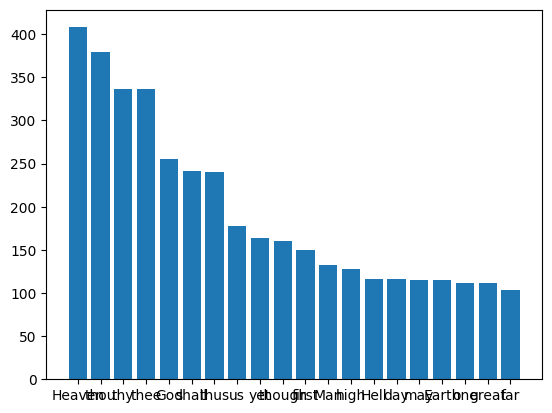

In [274]:
plt.bar(names,values)

In [275]:
# I chose lemmatization because it provides a more accurate representation of the root words. 

In [307]:
def top():
    pos1 = 0
    pos2 = 0
    pos3 = 0
    pos4 = 0
    pos5 = 0
    ps1 = ''
    ps2 = ''
    ps3 = ''
    ps4 = ''
    ps5 = ''
    for sentences in sent_text:
        sentiment = analyzer.polarity_scores(sentences)
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        if(pos > pos1):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos1
            ps2 = ps1
            pos1 = pos
            ps1 = sentences
        elif(pos > pos2):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos
            ps2 = sentences
        elif(pos > pos3):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos
            ps3 = sentences
        elif(pos > pos4):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos
            ps4 = sentences
        elif(pos > pos5):
            pos5 = pos
            ps5 = sentences
    poslist = []
    poslist.append(pos1)
    poslist.append(ps1)
    poslist.append(ps2)
    poslist.append(pos2)
    poslist.append(ps3)
    poslist.append(pos3)
    poslist.append(ps4)
    poslist.append(pos4)
    poslist.append(ps5)
    poslist.append(pos5)
    return poslist
postpos = top()
print(postpos)

[1.0, 'O friends!', 'O Heaven!', 1.0, 'O Friends!', 1.0, 'O Heaven!', 1.0, 'She fair, divinely fair, fit love for Gods!', 0.838]


In [311]:
def top():
    pos1 = 0
    pos2 = 0
    pos3 = 0
    pos4 = 0
    pos5 = 0
    ps1 = ''
    ps2 = ''
    ps3 = ''
    ps4 = ''
    ps5 = ''
    for sentences in sent_text:
        sentiment = analyzer.polarity_scores(sentences)
        pos = sentiment['neg']
        neg = sentiment['neg']
        neu = sentiment['neu']
        if(pos > pos1):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos1
            ps2 = ps1
            pos1 = pos
            ps1 = sentences
        elif(pos > pos2):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos
            ps2 = sentences
        elif(pos > pos3):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos
            ps3 = sentences
        elif(pos > pos4):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos
            ps4 = sentences
        elif(pos > pos5):
            pos5 = pos
            ps5 = sentences
    poslist = []
    poslist.append(pos1)
    poslist.append(ps1)
    poslist.append(ps2)
    poslist.append(pos2)
    poslist.append(ps3)
    poslist.append(pos3)
    poslist.append(ps4)
    poslist.append(pos4)
    poslist.append(ps5)
    poslist.append(pos5)
    return poslist
postneg = top()
print(postneg)

['No!', 'O Hell!', 'Alas!', 'Me miserable!', 'Sad cure!']


In [314]:
def top():
    pos1 = 0
    pos2 = 0
    pos3 = 0
    pos4 = 0
    pos5 = 0
    ps1 = ''
    ps2 = ''
    ps3 = ''
    ps4 = ''
    ps5 = ''
    for sentences in sent_text:
        sentiment = analyzer.polarity_scores(sentences)
        pos = sentiment['neu']
        neg = sentiment['neg']
        neu = sentiment['neu']
        if(pos > pos1):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos1
            ps2 = ps1
            pos1 = pos
            ps1 = sentences
        elif(pos > pos2):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos2
            ps3 = ps2
            pos2 = pos
            ps2 = sentences
        elif(pos > pos3):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos3
            ps4 = ps3
            pos3 = pos
            ps3 = sentences
        elif(pos > pos4):
            pos5 = pos4
            ps5 = ps4
            pos4 = pos
            ps4 = sentences
        elif(pos > pos5):
            pos5 = pos
            ps5 = sentences
    poslist = []
    poslist.append(pos1)
    poslist.append(ps1)
    poslist.append(ps2)
    poslist.append(pos2)
    poslist.append(ps3)
    poslist.append(pos3)
    poslist.append(ps4)
    poslist.append(pos4)
    poslist.append(ps5)
    poslist.append(pos5)
    return poslist
post = top()
print(post)

[1.0, 'Oh how unlike the place from whence they fell!', 'But see!', 1.0, 'Him, haply slumbering on the Norway foam, \nThe pilot of some small night-foundered skiff, \nDeeming some island, oft, as seamen tell, \nWith fixed anchor in his scaly rind, \nMoors by his side under the lee, while night \nInvests the sea, and wished morn delays.', 1.0, 'Such resting found the sole \nOf unblest feet.', 1.0, 'Awake, arise, or be for ever fallen!"', 1.0]


#The sentences that are provided with the highest scores are fairly accurate however with the positive and negative scores shorter sentences are weighed mcuh higher. This means while they may be very positive or negative they don't have much effect on the overall story as they're shorter sentences. I feel with a longer story it would be more effective to get the reading of paragraohs instead of sentences.